# Going Deeper

*... is not always a good idea...*

Deep Learning is all about **depth** so let's go deeper (what could go wrong anyway?)!!!

Start with the usual stuff:

In [3]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam
%matplotlib inline

# Prepare the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28 * 28)) / 255.0
x_test = x_test.reshape((-1, 28 * 28)) / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


Let's see what would happen a few years ago:

In [4]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(256, activation='sigmoid',  kernel_initializer='random_uniform'))
model.add(Dense(256, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(512, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(512, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(1024, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(1024, activation='sigmoid', kernel_initializer='random_uniform'))

model.add(Dense(10, activation='softmax'))

from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=0.9), metrics=['accuracy'])

results = model.fit(x_train, y_train, epochs=20, batch_size=256, verbose=1, validation_data=(x_test, y_test))
print("Train accuracy: ", model.evaluate(x_train, y_train, batch_size=128))
print("Test accuracy: ", model.evaluate(x_test, y_test, batch_size=128))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1065 - loss: 2.3140 - val_accuracy: 0.1009 - val_loss: 2.3023
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1037 - loss: 2.3046 - val_accuracy: 0.1135 - val_loss: 2.3037
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1062 - loss: 2.3037 - val_accuracy: 0.1028 - val_loss: 2.3067
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1085 - loss: 2.3038 - val_accuracy: 0.1135 - val_loss: 2.3027
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1069 - loss: 2.3040 - val_accuracy: 0.1135 - val_loss: 2.3018
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1083 - loss: 2.3041 - val_accuracy: 0.1010 - val_loss: 2.3027
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1047 - loss: 2.3040 - val_accuracy: 0.0982 - val_loss: 2.3047
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1059 - loss: 2.3038 - val_accuracy: 0.

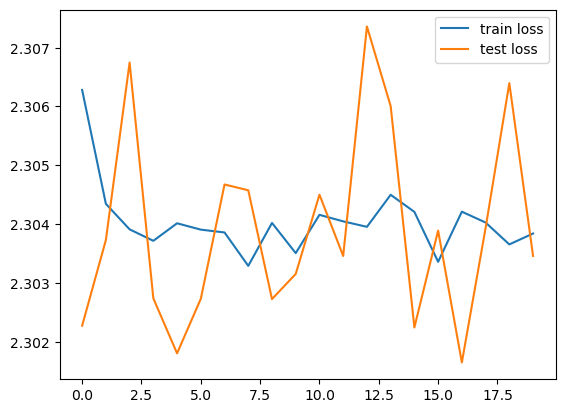

In [5]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

Are we doing something wrong? Let's try a simpler model!

In [8]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(256, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(10, activation='softmax'))
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=0.9), metrics=['accuracy'])

results = model.fit(x_train, y_train, epochs=20, batch_size=256, verbose=1, validation_data=(x_test, y_test))
print("Train accuracy: ", model.evaluate(x_train, y_train, batch_size=128))
print("Test accuracy: ", model.evaluate(x_test, y_test, batch_size=128))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2859 - loss: 2.2737 - val_accuracy: 0.6371 - val_loss: 1.9958
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6681 - loss: 1.9327 - val_accuracy: 0.7453 - val_loss: 1.7178
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7426 - loss: 1.6669 - val_accuracy: 0.7778 - val_loss: 1.4707
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7767 - loss: 1.4304 - val_accuracy: 0.8033 - val_loss: 1.2625
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7979 - loss: 1.2363 - val_accuracy: 0.8190 - val_loss: 1.0979
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8109 - loss: 1.0864 - val_accuracy: 0.8276 - val_loss: 0.9711
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8242 - loss: 0.9667 - val_accuracy: 0.8374 - val_loss: 0.8732
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8342 - loss: 0.8734 - val_accuracy: 0.

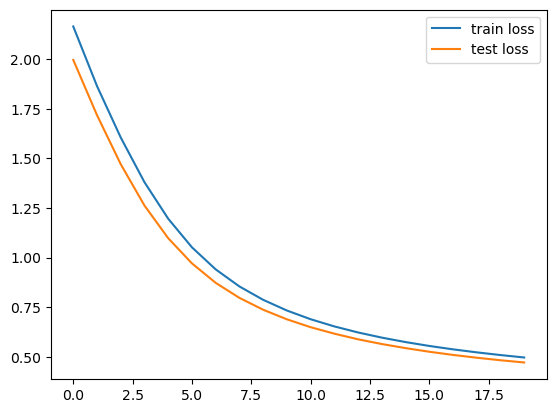

In [9]:
plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

### So what makes deep learning work?

Careful initialization + appropriate activation functions + weight sharing / smart architectures + regularization

Tips:
1. Ensure that a good initialization scheme is used (e.g., Xavier, He, etc. )
2. Use an activation function that does not lead to vanishing gradients (e.g., relu, prelu, elu, ...)
3. Use a regularized network structure (e.g., CNNs, residual connection, ...)
4. Use regularization (e.g., dropout) and/or batch normalization
5. Use an advanced optimizer (e.g., Adam, RMSProp, ...) (use them with a grain of salt)

Let's use some of these techniques!

In [12]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(1024, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
model.add(Dense(1024, activation='relu', kernel_initializer=keras.initializers.he_uniform()))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

That is a deep one indeed! Let's examine its architecture!

In [13]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,246,154 (8.57 MB)

 Trainable params: 2,246,154 (8.57 MB)

 Non-trainable params: 0 (0.00 B)

Train the model:

In [14]:
results = model.fit(x_train, y_train, epochs=20, batch_size=256, verbose=2, validation_data=(x_test, y_test))

Epoch 1/20
235/235 - 3s - 14ms/step - accuracy: 0.8625 - loss: 0.4789 - val_accuracy: 0.9395 - val_loss: 0.1948
Epoch 2/20
235/235 - 2s - 8ms/step - accuracy: 0.9515 - loss: 0.1596 - val_accuracy: 0.9597 - val_loss: 0.1323
Epoch 3/20
235/235 - 2s - 7ms/step - accuracy: 0.9672 - loss: 0.1081 - val_accuracy: 0.9630 - val_loss: 0.1176
Epoch 4/20
235/235 - 2s - 7ms/step - accuracy: 0.9765 - loss: 0.0779 - val_accuracy: 0.9686 - val_loss: 0.0998
Epoch 5/20
235/235 - 2s - 8ms/step - accuracy: 0.9825 - loss: 0.0573 - val_accuracy: 0.9681 - val_loss: 0.1000
Epoch 6/20
235/235 - 2s - 8ms/step - accuracy: 0.9878 - loss: 0.0423 - val_accuracy: 0.9695 - val_loss: 0.0953
Epoch 7/20
235/235 - 2s - 8ms/step - accuracy: 0.9916 - loss: 0.0307 - val_accuracy: 0.9737 - val_loss: 0.0842
Epoch 8/20
235/235 - 2s - 7ms/step - accuracy: 0.9936 - loss: 0.0234 - val_accuracy: 0.9709 - val_loss: 0.0999
Epoch 9/20
235/235 - 2s - 7ms/step - accuracy: 0.9949 - loss: 0.0182 - val_accuracy: 0.9748 - val_loss: 0.0863


The network perfectly learns the training set (100% accuracy), but it is still below state-of-the-art (~1.9% test error). Let's examine the training curves:

Log data:  dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


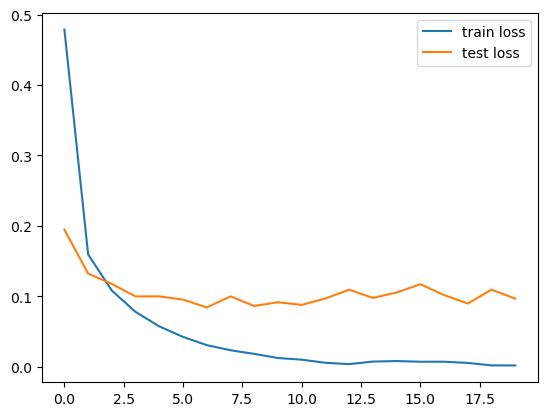

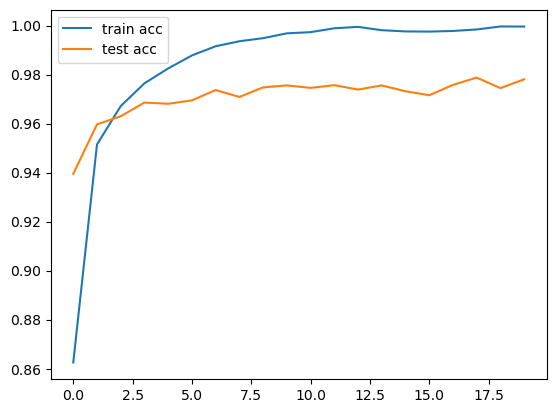

In [15]:
print("Log data: ", results.history.keys())

plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['train acc', 'test acc'])